In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("data/Mall_Customers.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
df.rename(columns={"Annual Income (k$)":"annual_income","Spending Score (1-100)":"score"},inplace=True)

In [4]:
data = df.iloc[:,-2:]
data

,annual_income,score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


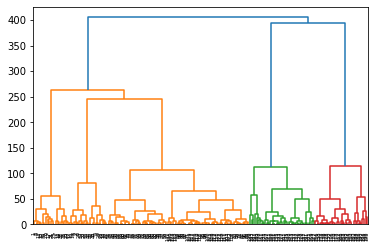

In [5]:
linkage_data = linkage(data, method='ward', metric='euclidean')
dendrogram(linkage_data)
plt.show()

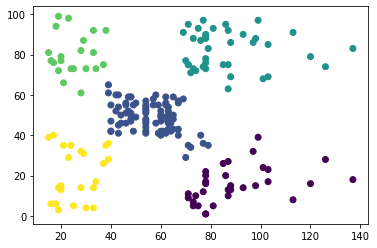

In [6]:
hierarchical_cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
labels = hierarchical_cluster.fit_predict(data)

plt.scatter(data["annual_income"],data["score"],c=labels)
plt.show()